#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**

using the hotels-europe dataset

version 1.0 2021-05-05

In [18]:
import os
import sys
import warnings

import mizani
import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-europe/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-europe-compare/"
output = dirname + "da_case_studies/ch03-hotels-europe-compare/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [ ]:
# Import the prewritten helper functions
from py_helper_functions import *
sns.set_theme(rc=da_theme, palette=color)

#### Load in clean and tidy data and create workfile

In [4]:
hotels_europe_price = pd.read_csv(data_in + "hotels-europe_price.csv")
#hotels_europe_price = pd.read_csv("https://osf.io/download/p6tyr/")
hotels_europe_features = pd.read_csv(data_in + "hotels-europe_features.csv")
#hotels_europe_features = pd.read_csv("https://osf.io/download/utwjs/")


In [5]:
hotels_europe = pd.merge(
    hotels_europe_price, hotels_europe_features, how="left", on="hotel_id"
)
del hotels_europe_price
del hotels_europe_features

#### Filter for same Vienna data we used + London same date

In [6]:
hotels_europe_cut = hotels_europe.loc[
    (hotels_europe["year"] == 2017)
    & (hotels_europe["month"] == 11)
    & (hotels_europe["weekend"] == 0)
    & (hotels_europe["city"].isin(["Vienna", "London"]))
    & (hotels_europe["accommodation_type"] == "Hotel")
    & (hotels_europe["stars"] >= 3)
    & (hotels_europe["stars"] <= 4)
    & (hotels_europe["stars"].notna())
    & (hotels_europe["city_actual"].isin(["Vienna", "London"]))
    & (hotels_europe["price"] <= 600)
]

In [7]:
hotels_europe_cut.price.max()

491

In [8]:
hotels_europe_cut.groupby("city").agg(
    mean_price=("price", "mean"), max=("price", "max"), n=("price", "size")
)

,mean_price,max,n
city,,,
London,202.356322,491,435
Vienna,109.975845,383,207


### Figure 3.6 The distribution of hotel price in Vienna and London

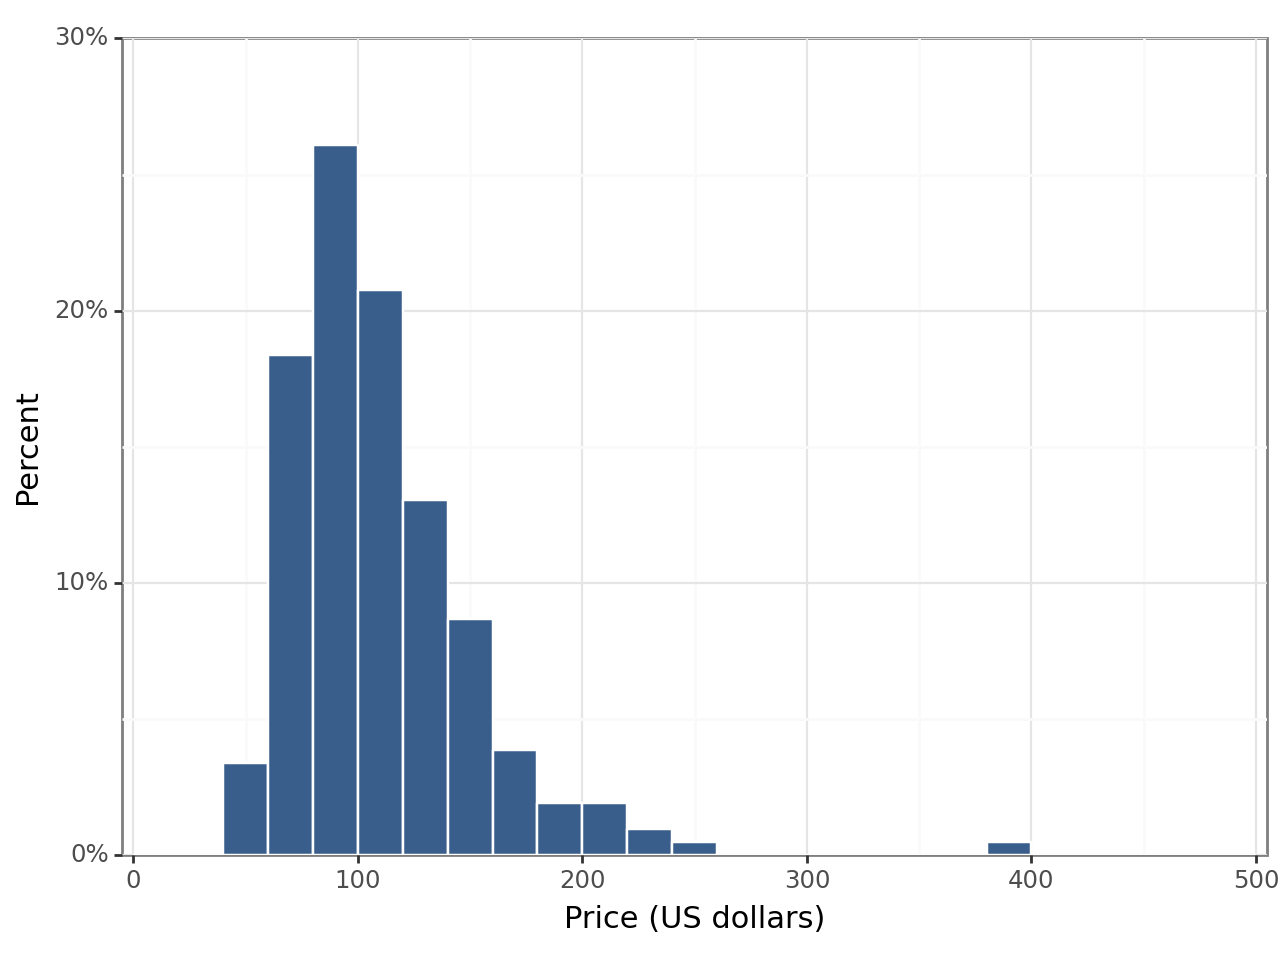

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(hotels_europe_cut.query('city=="Vienna"'), aes(x="price"))
    + geom_histogram(
        aes(y="stat(count)/sum(stat(count))"),
        binwidth=20,
        fill=color[0],
        color="#FFFFFF",
        boundary=0,
        closed="left",
    )
    + labs(x="Price (US dollars)", y="Percent")
    + scale_x_continuous(
        expand=(0.01, 0.01), limits=(0, 500), breaks=seq(0, 500, by=100)
    )
    + scale_y_continuous(
        expand=(0.00, 0.00),
        limits=(0, 0.3),
        breaks=seq(0, 0.3, by=0.1),
        labels=percent_format(),
    )
    + theme_bw()
)

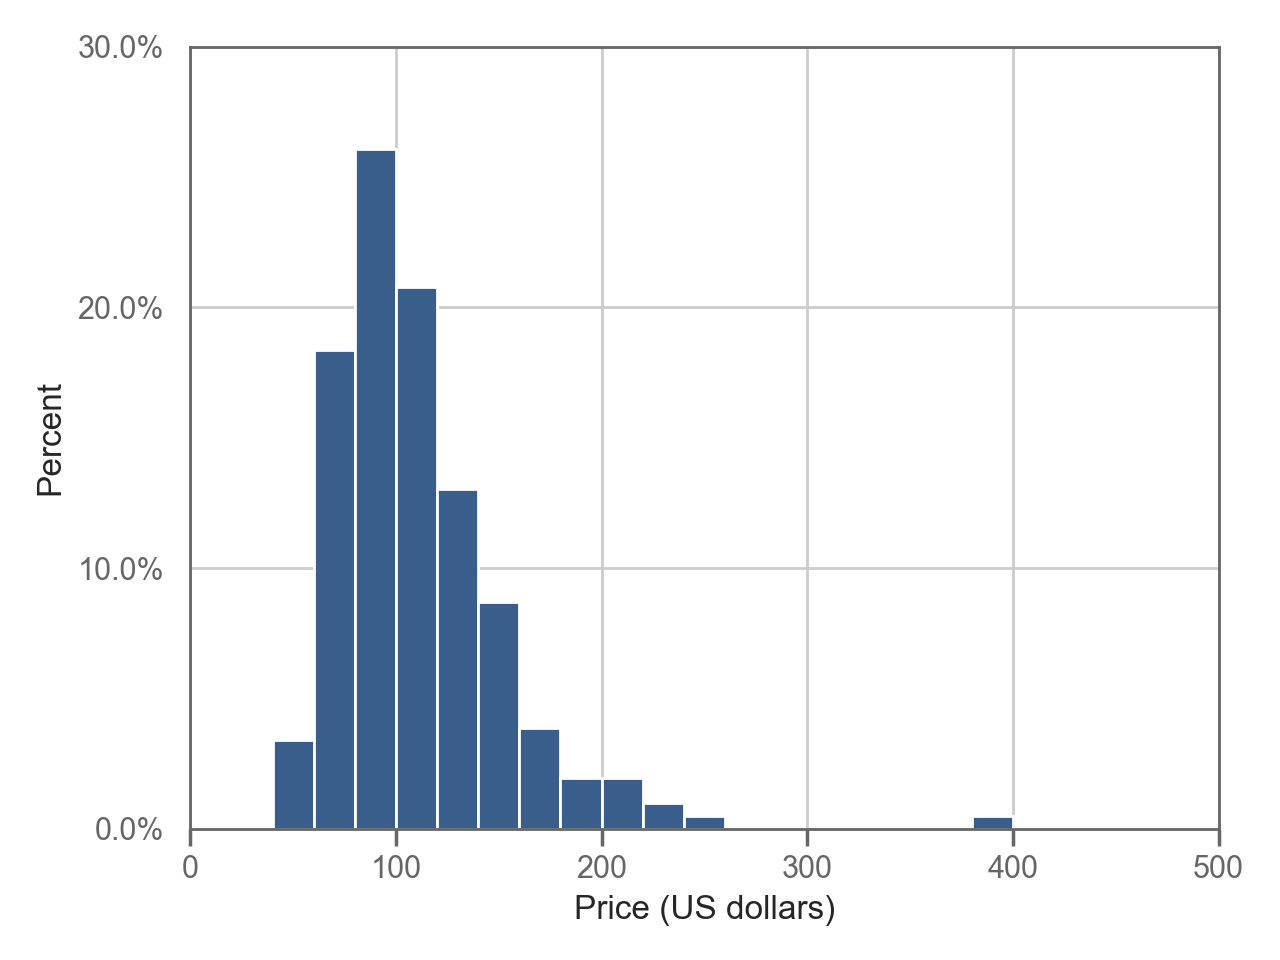

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Plot
hotels_vienna = hotels_europe_cut[hotels_europe_cut["city"] == "Vienna"]

sns.histplot(
    data= hotels_vienna,
    x=hotels_vienna["price"],
    stat="probability",  # Seaborn handles normalized counts with 'density'
    binwidth=20,
    color=color[0],
    binrange=(0, 500),
    alpha = 1 
)

# Adjust axes
plt.xlabel("Price (US dollars)")
plt.ylabel("Percent")
plt.xlim(0, 500)
plt.ylim(0, 0.3)
plt.xticks(ticks=range(0, 501, 100))
plt.yticks(ticks=[0, 0.1, 0.2, 0.3])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add a theme
#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
#plt.gca().set_facecolor("white")
#sns.despine()

plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

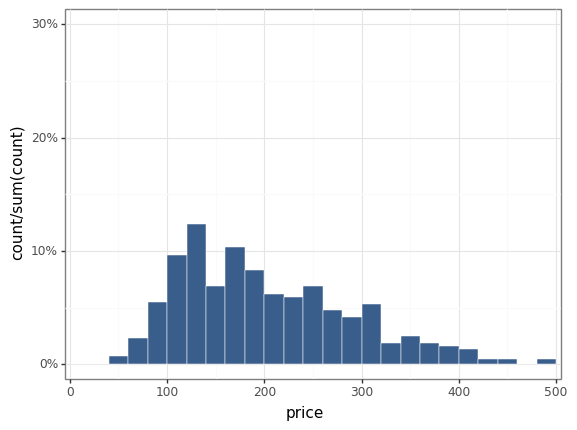

<ggplot: (352321443)>

In [10]:
# London
(
    ggplot(
        hotels_europe_cut.query('city=="London"'),
        aes(x="price", y="stat(count)/sum(stat(count))"),
    )
    + geom_histogram(
        binwidth=20,
        fill=color[0],
        color="#FFFFFF",
        size=0.2,
        alpha=0.8,
        boundary=0,
        closed="left",
    )
    + scale_y_continuous(labels=percent_format(), expand=[0.01, 0.01], limits=[0, 0.3])
    + scale_x_continuous(
        expand=[0.01, 0.01], limits=[0, 500], breaks=list(range(0, 600, 100))
    )
    + theme_bw()
)

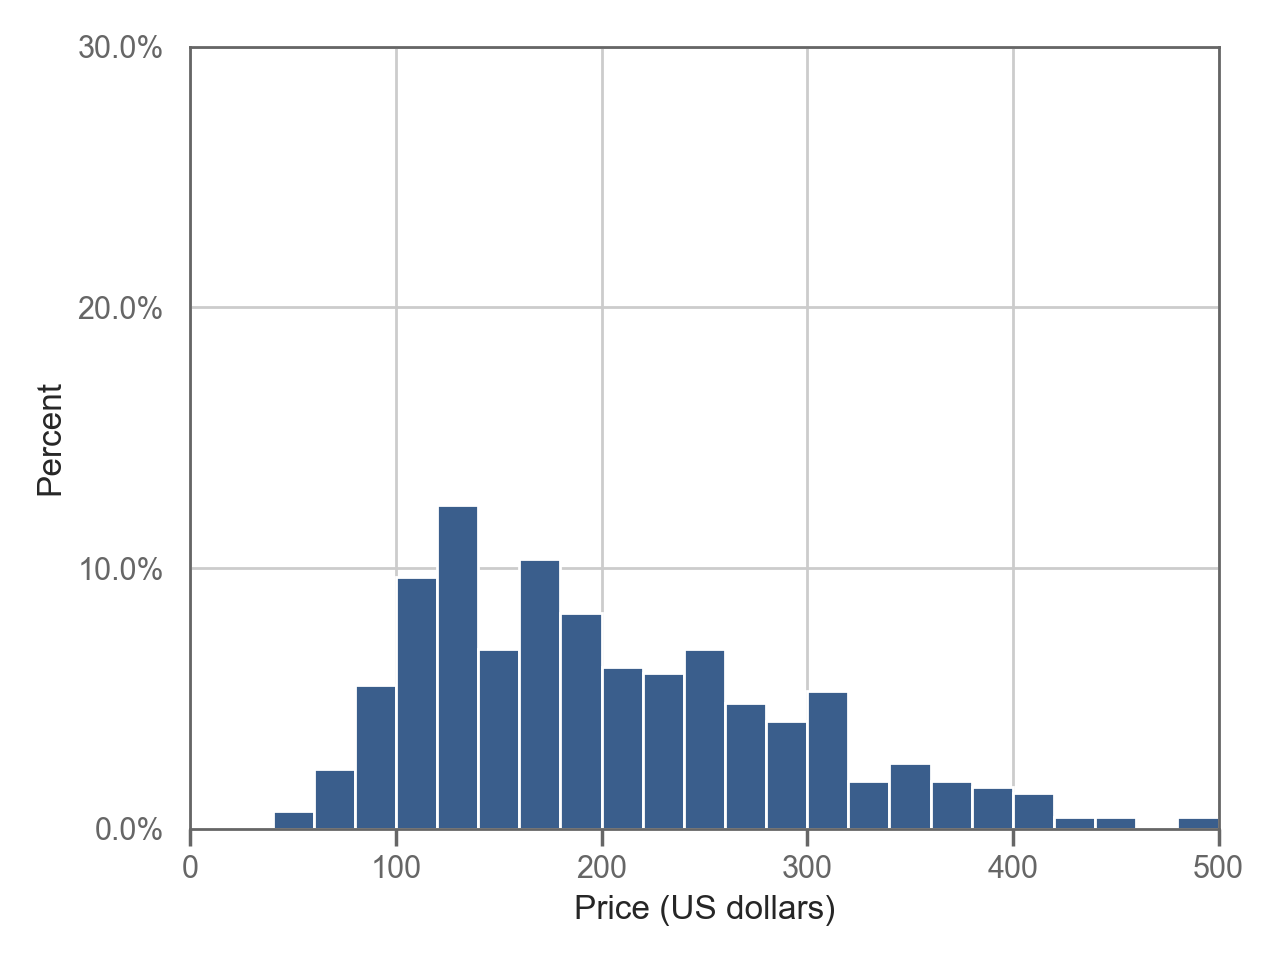

<Figure size 1000x600 with 0 Axes>

In [40]:
hotels_london = hotels_europe_cut[hotels_europe_cut["city"] == "London"]

sns.histplot(
    data= hotels_london,
    x=hotels_london["price"],
    stat="probability",  # Seaborn handles normalized counts with 'density'
    binwidth=20,
    color=color[0],
    binrange=(0, 500),
    alpha = 1 
)

# Adjust axes
plt.xlabel("Price (US dollars)")
plt.ylabel("Percent")
plt.xlim(0, 500)
plt.ylim(0, 0.3)
plt.xticks(ticks=range(0, 501, 100))
plt.yticks(ticks=[0, 0.1, 0.2, 0.3])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add a theme
#plt.grid(True, which="both", linestyle="--", linewidth=0.5)
#plt.gca().set_facecolor("white")
#sns.despine()

plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

### Figure 3.7 Density plots of hotel prices: Vienna and London

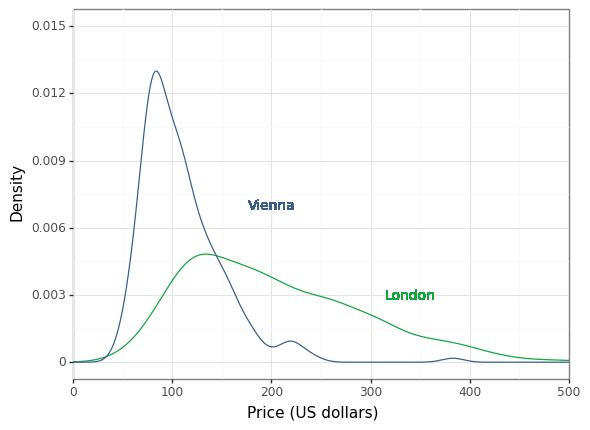

<ggplot: (383826914)>

In [11]:
(
    ggplot(hotels_europe_cut, aes(x="price", y="stat(density)", color="city"))
    + geom_line(stat="density", show_legend="False")
    + labs(x="Price (US dollars)", y="Density", color="")
    + scale_color_manual(
        name="", values=[color[1], color[0]], labels=["London", "Vienna"]
    )
    + scale_y_continuous(limits=[0, 0.015], breaks=seq(0, 0.015, 0.003))
    + scale_x_continuous(expand=[0.0, 0.0], limits=[0, 500], breaks=seq(0, 500, 100))
    + geom_text(aes(x=340, y=0.003, label=["London"]), color=color[1], size=10)
    + geom_text(aes(x=200, y=0.007, label=["Vienna"]), color=color[0], size=10)
    + theme_bw()
)

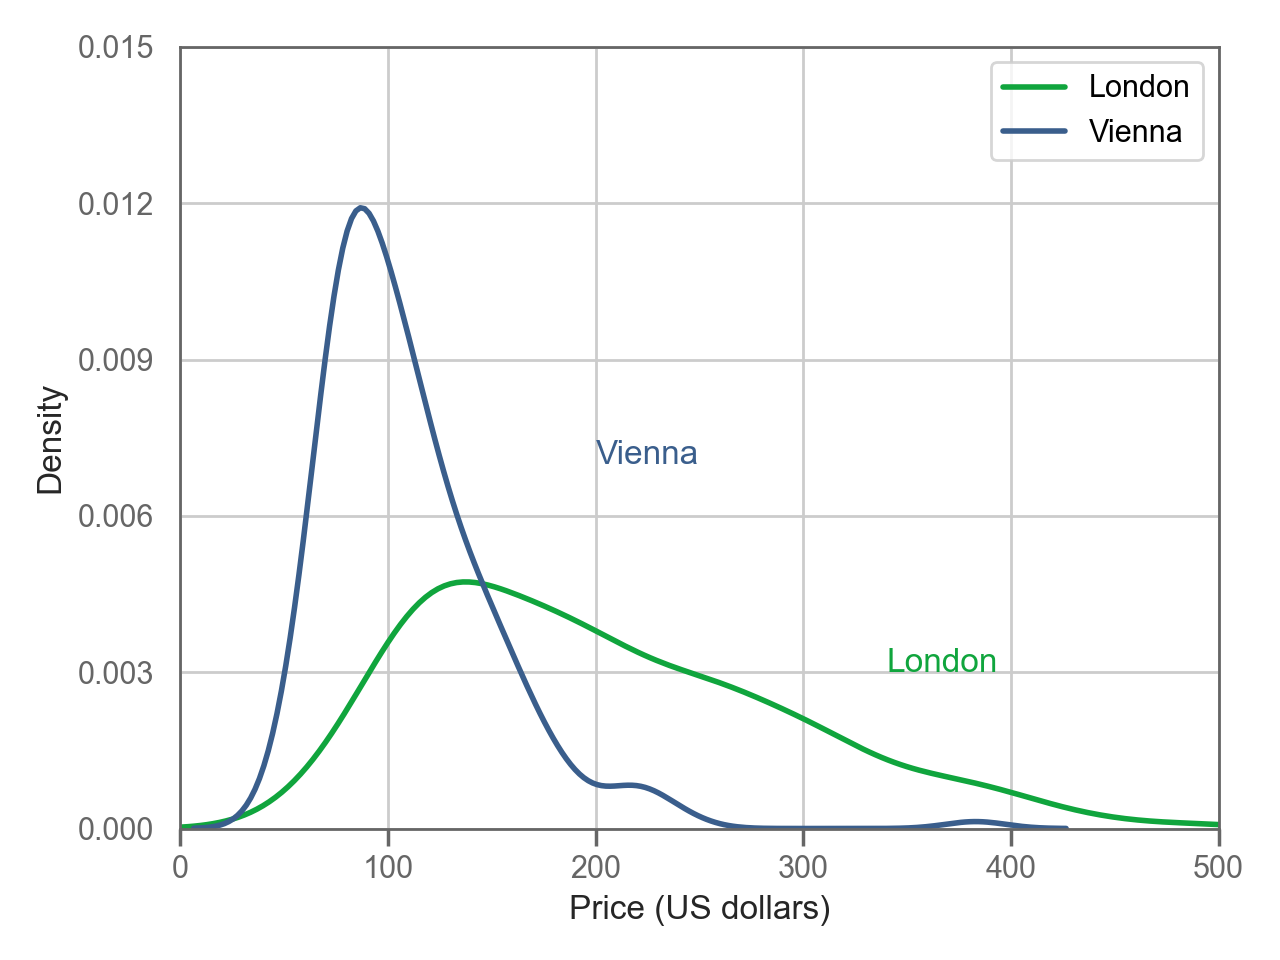

<Figure size 1000x600 with 0 Axes>

In [38]:
# KDE plots for each city
sns.kdeplot(
    data=hotels_europe_cut.query('city == "London"'),
    x="price",
    color=color[1],
    label="London",
    linewidth=2
)
sns.kdeplot(
    data=hotels_europe_cut.query('city == "Vienna"'),
    x="price",
    color=color[0],
    label="Vienna",
    linewidth=2
)

# Adjust axes
plt.xlim(0, 500)
plt.ylim(0, 0.015)
plt.xticks(ticks=range(0, 501, 100))
plt.yticks(ticks=[0, 0.003, 0.006, 0.009, 0.012, 0.015])

# Add annotations
plt.text(340, 0.003, "London", color=color[1], fontsize=12)
plt.text(200, 0.007, "Vienna", color=color[0], fontsize=12)

# Labels and legend
plt.xlabel("Price (US dollars)")
plt.ylabel("Density")
plt.legend(title="", loc="upper right")



plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.show()

#### Table 3.6

In [12]:
hotels_europe_cut.groupby("city").agg(
    n=("price", "size"),
    mean=("price", np.mean),
    median=("price", np.median),
    min=("price", min),
    max=("price", max),
    sd=("price", np.std),
    skew=("price", skew),
)

,n,mean,median,min,max,sd,skew
city,,,,,,,
London,435,202.356322,186.0,49,491,88.128830,0.186
Vienna,207,109.975845,100.0,50,383,42.221381,0.237
